In [9]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adam

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist_data = pd.read_csv("mnist_train.csv")
mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mnist_data.drop(["label"], axis=1), mnist_data[["label"]], 
                                       test_size=0.20, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((48000, 784), (12000, 784), (48000, 1), (12000, 1))

In [4]:
y_train = y_train.to_numpy() #creates a numpy array of the df
x_train = x_train.to_numpy() #creates a numpy array of the df
##############################################################
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
##############################################################
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
##############################################################
x_train /= 255
x_test /= 255

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

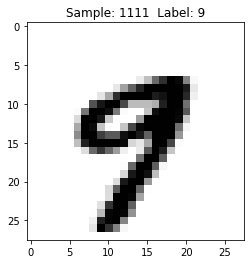

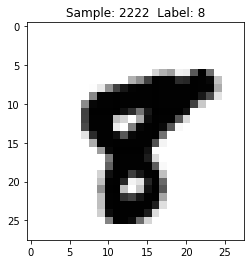

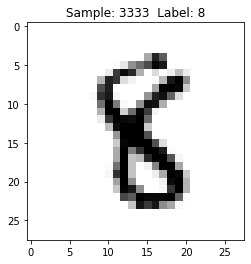

In [8]:
def display_sample(num):
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1111)
display_sample(2222)
display_sample(3333)

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=50, 
                    epochs=20, 
                    verbose=2,
                    validation_data=(x_test, y_test))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 12s - loss: 0.3445 - accuracy: 0.8938 - val_loss: 0.1357 - val_accuracy: 0.9589
Epoch 2/20
 - 12s - loss: 0.1756 - accuracy: 0.9475 - val_loss: 0.1042 - val_accuracy: 0.9697
Epoch 3/20
 - 12s - loss: 0.1412 - accuracy: 0.9574 - val_loss: 0.0918 - val_accuracy: 0.9735
Epoch 4/20
 - 12s - loss: 0.1250 - accuracy: 0.9628 - val_loss: 0.0880 - val_accuracy: 0.9746
Epoch 5/20
 - 14s - loss: 0.1081 - accuracy: 0.9673 - val_loss: 0.0819 - val_accuracy: 0.9781
Epoch 6/20
 - 15s - loss: 0.0996 - accuracy: 0.9684 - val_loss: 0.0847 - val_accuracy: 0.9762
Epoch 7/20
 - 15s - loss: 0.0958 - accuracy: 0.9707 - val_loss: 0.0820 - val_accuracy: 0.9786
Epoch 8/20
 - 15s - loss: 0.0898 - accuracy: 0.9732 - val_loss: 0.0842 - val_accuracy: 0.9782
Epoch 9/20
 - 15s - loss: 0.0844 - accuracy: 0.9745 - val_loss: 0.0796 - val_accuracy: 0.9796
Epoch 10/20
 - 15s - loss: 0.0836 - accuracy: 0.9744 - val_loss: 0.0778 - val_accuracy: 0.9784
Epoch 11

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08196693071322321
Test accuracy: 0.9807500243186951


In [17]:
import numpy as np
np.where(model.predict(x_test)<0.5, 0, 1)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [19]:
model.predict_classes(x_test)

array([7, 3, 8, ..., 9, 7, 2])

In [20]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)